# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [6]:
# your code here
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [12]:
# your code here
e_rates = pd.read_csv('exch_rates.csv')
e_rates.Frequency = pd.to_datetime(e_rates.Frequency)
e_rates.set_index('Frequency',inplace=True)
e_rates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6905 entries, 2000-01-01 to 2018-11-26
Data columns (total 3 columns):
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3)
memory usage: 215.8 KB


Plot the three exchange rates in one plot

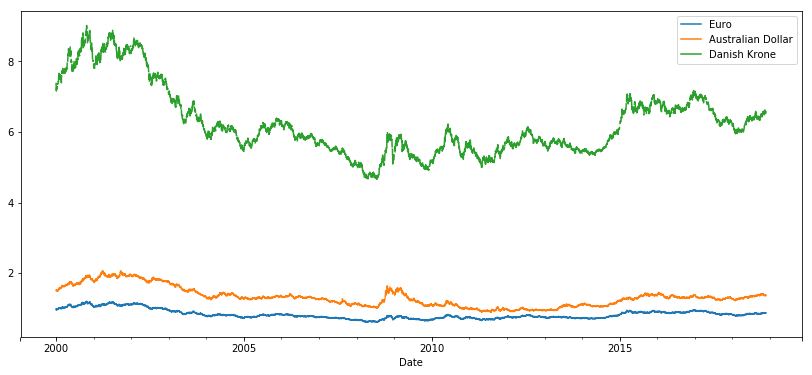

In [16]:
# your code here
e_rates.plot(figsize=(14,6))
plt.xlabel('Date');

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [17]:
# your code here
e_rates.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.<br>
The currencies are highly correlated, with Danish Krone and the Euro being almost perfectly correltaed. This is due to the fact that the Danish Krone is pegged to the Euro.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

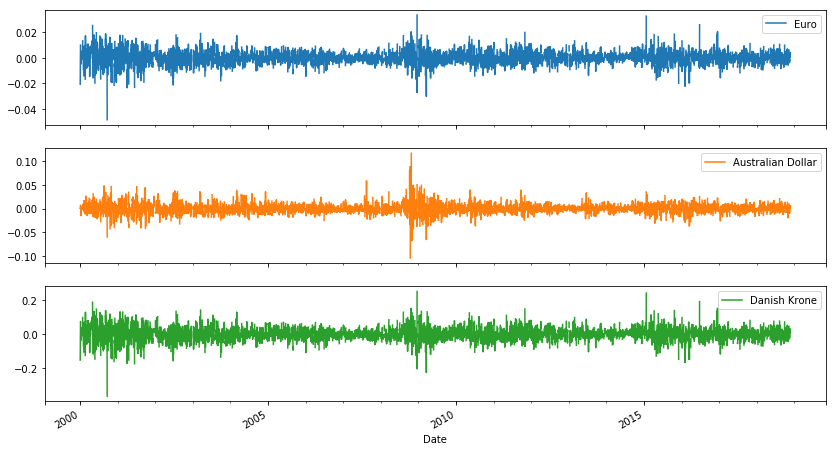

In [22]:
# your code here
e_rates.diff().plot(subplots=True,figsize=(14,8), legend=True)
plt.xlabel('Date');

In [23]:
# your code here
e_rates.diff().corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on<br>
The correlation between Euro and Australian Dollar decreased.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [36]:
# your code here
euro = e_rates['Euro']

Text(0.5, 0, 'Date')

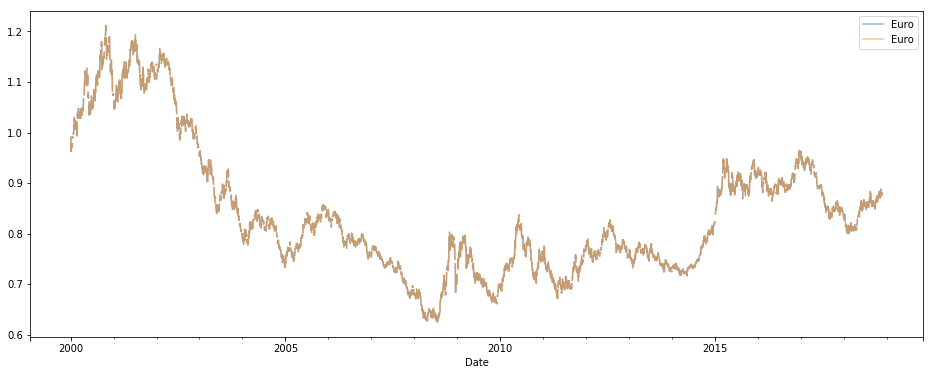

In [34]:
# your code here
euro_shift1 = euro.shift(1)
lag_1 = pd.concat([euro,euro_shift1],axis=1)
lag_1.plot(figsize=(16,6), legend=True, alpha=.5)
plt.xlabel('Date')

In [43]:
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

Text(0.5, 0, 'Date')

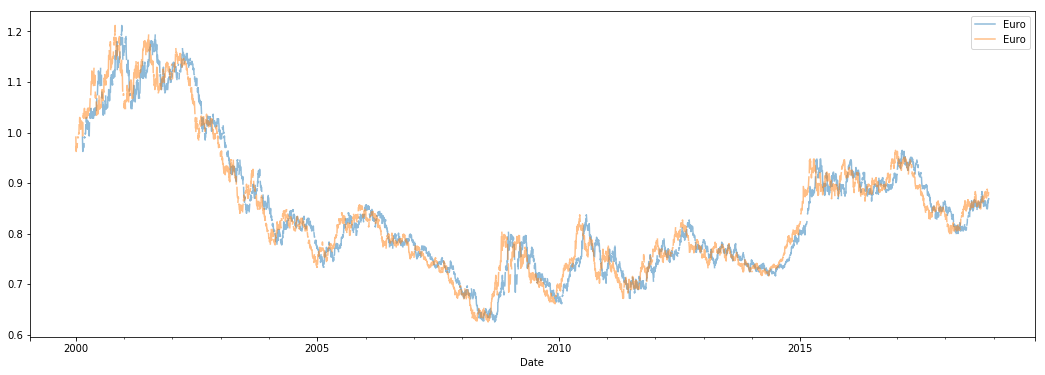

In [41]:
# your code here
euro_shift50 = euro.shift(50)
lag_50 = pd.concat([euro_shift5,euro],axis=1)
lag_50.plot(figsize=(18,6), legend=True, alpha=.5)
plt.xlabel('Date')

In [42]:
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?

Autocorrelation is very high even for a lag such as 50. 

Knowing this, let's plot the ACF now.

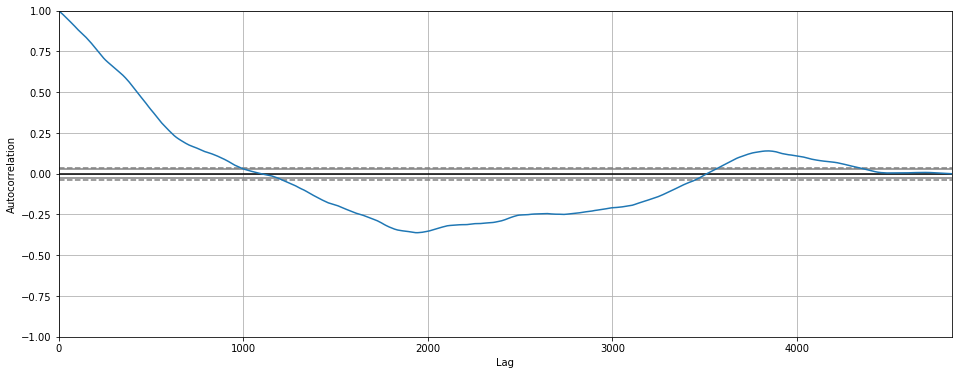

In [45]:
# your code here
plt.figure(figsize=(16,6))
pd.plotting.autocorrelation_plot(euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

<Figure size 1152x432 with 0 Axes>

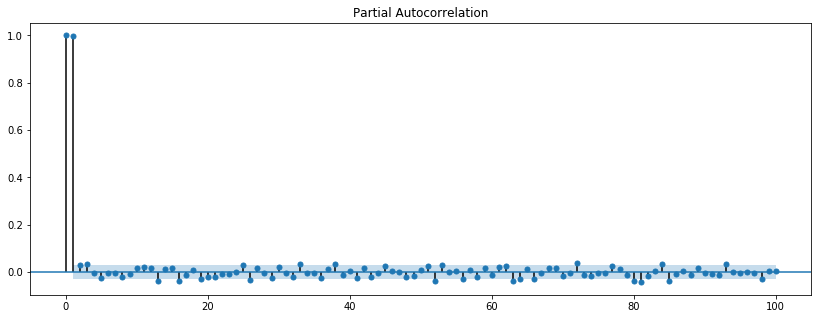

In [47]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(16,6))
plot_pacf(euro.dropna(), lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [51]:
# your code here
passengers = pd.read_csv('passengers.csv')
passengers.Month = pd.to_datetime(passengers.Month)
passengers.set_index('Month',inplace=True)
passengers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


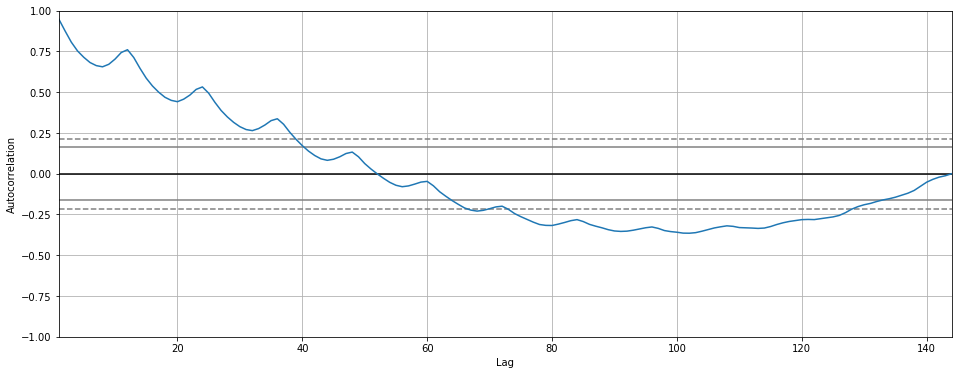

In [52]:
# your code here
plt.figure(figsize=(16,6))
pd.plotting.autocorrelation_plot(passengers.dropna());

/Users/feraguilari/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 1152x432 with 0 Axes>

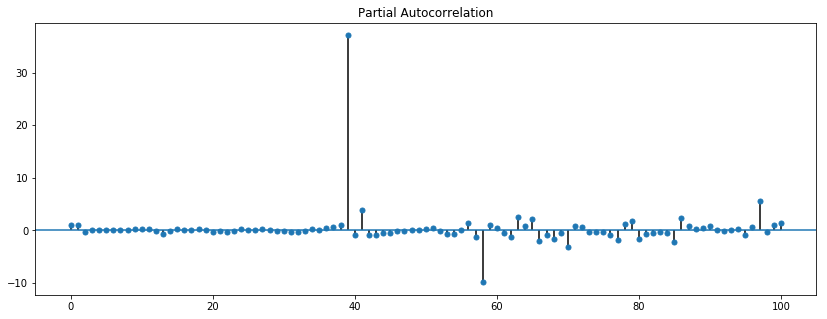

In [56]:
# your code here
plt.figure(figsize=(16,6))
plot_pacf(passengers.dropna(), lags = 100);

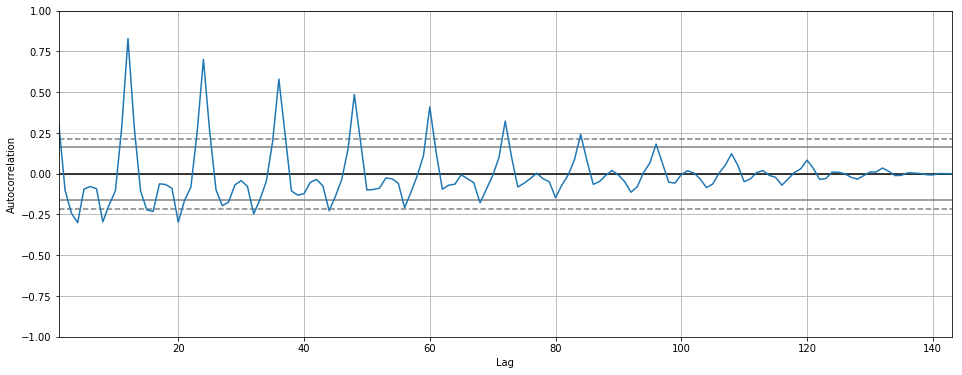

In [60]:
# your code here
plt.figure(figsize=(16,6))
pd.plotting.autocorrelation_plot(passengers.diff(periods=1).dropna());

<Figure size 1152x432 with 0 Axes>

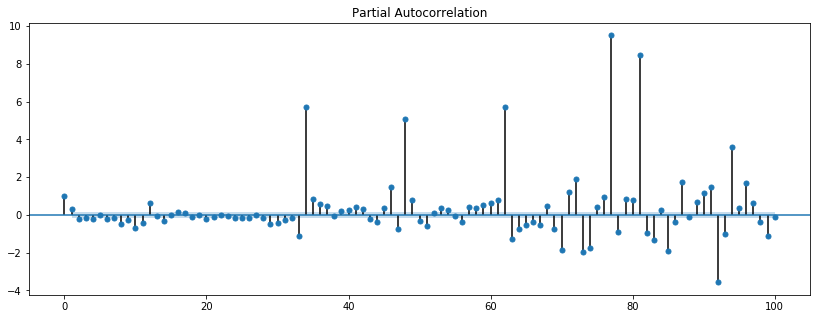

In [59]:
# your code here
plt.figure(figsize=(16,6))
plot_pacf(passengers.diff(periods=1).dropna(), lags = 100);

### Your conclusion here

There is evidence of seasonality in teh time series.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [68]:
# your code here
NYSE = pd.read_csv('NYSE_monthly.csv')
NYSE.Month = pd.to_datetime(NYSE.Month)
NYSE.set_index('Month',inplace=True)
NYSE.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


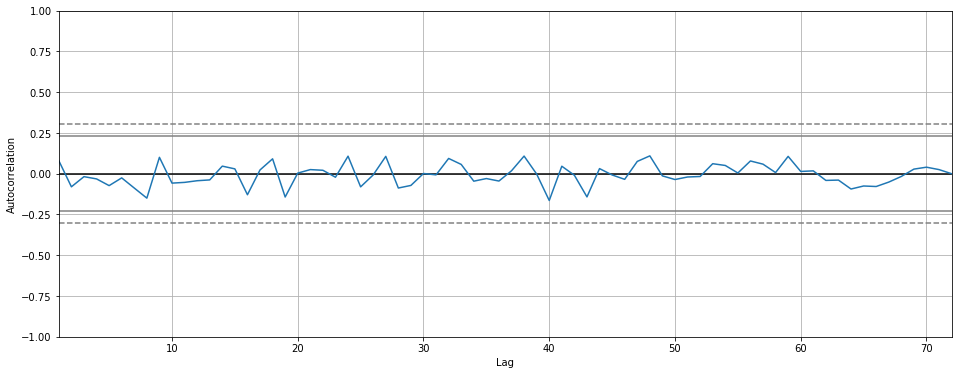

In [63]:
# your code here
plt.figure(figsize=(16,6))
pd.plotting.autocorrelation_plot(NYSE.dropna());

/Users/feraguilari/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


<Figure size 1152x432 with 0 Axes>

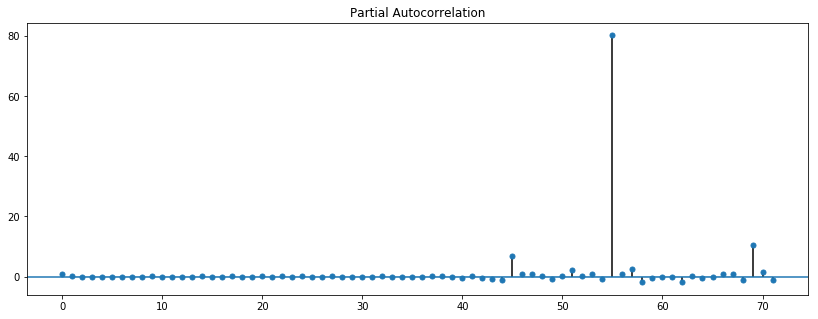

In [65]:
plt.figure(figsize=(16,6))
plot_pacf(NYSE.dropna(), lags = 100);

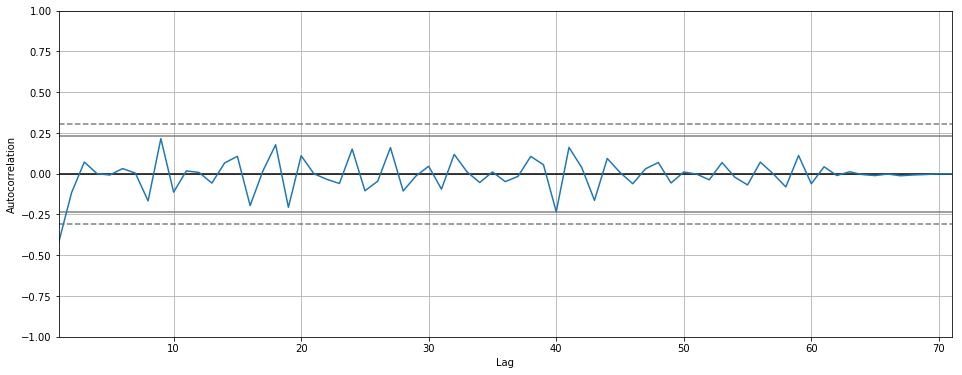

In [67]:
# your code here
plt.figure(figsize=(16,6))
pd.plotting.autocorrelation_plot(NYSE.diff(periods=1).dropna());

<Figure size 1152x432 with 0 Axes>

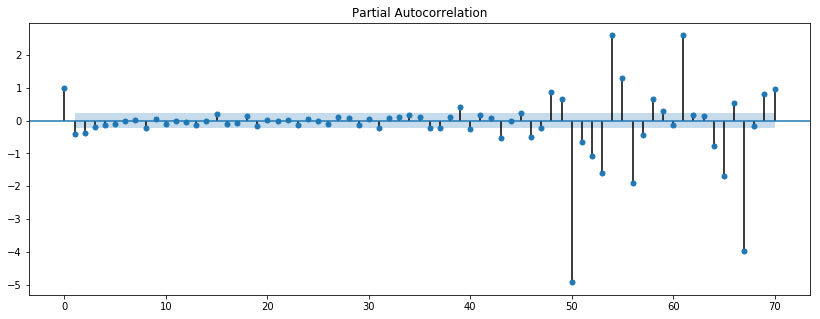

In [66]:
plt.figure(figsize=(16,6))
plot_pacf(NYSE.diff(periods=1).dropna(), lags = 100);

## Your conclusion here

Autocorrelations and partial autocorrelations are virtually 0 for any lag.



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!